<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a> Ce TP est mis à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons BY-SA</a>.<br/>
Le code des cellules exécutables est diponible sous les termes de la [Licence MIT](https://mit-license.org/).

**Richard JARRY** <br/>
[SPM](https://www.gouvernement.fr/les-services-du-premier-ministre) /
[SGDSN](http://www.sgdsn.gouv.fr/) /
[ANSSI](https://ssi.gouv.fr) <br/>
juillet 2022 (Paris, France)

# TP2 Apprentissage automatique

## 1. Préparation du TP

### 1.1 Prérequis théoriques

 - Algorithmes de réduction (ACP)
 - Algorithmes de partitionnement (DBSCAN)
 - Algorithmes de classification supervisée (logit)

### 1.2 Prérequis techniques

1.2.1 **Vidéos d'introduction**

 - [Fondamentaux Scikit-learn](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20)
 - [Mesures de précision et d'erreur](https://www.youtube.com/watch?v=_TE9fDgtOaE&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)

1.2.2 **Référence complète**

 - [API Pandas](https://pandas.pydata.org/docs)
 - [API Numpy](https://numpy.org/doc/stable)
 - [API Seaborn](https://seaborn.pydata.org/api)
 - [API Scikit-learn](https://scikit-learn.org/stable/modules/classes)

### 1.3 Environnement de développement

Même environnement qu'au TP1, avec l'ajout des bibliothèques `scikit-learn` et `textdistance`.

In [ ]:
!pip3 install numpy pandas seaborn scikit-learn textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Si vous pouvez exécuter cette cellule sans erreur,
# c'est que votre environnement est prêt pour le TP.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import textdistance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Notre jeu de données principal est [Majestic Million](https://majestic.com/reports/majestic-million), une liste des noms de domaine les plus visibles sur Internet. 

In [ ]:
majestic_million = pd.read_csv("https://downloads.majestic.com/majestic_million.csv")
majestic_million

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,491368,2416780,google.com,com,1,1,491249,2414156
1,2,2,facebook.com,com,490021,2566596,facebook.com,com,2,2,489727,2563797
2,3,3,youtube.com,com,441964,2081063,youtube.com,com,3,3,441842,2078756
3,4,4,twitter.com,com,435398,2064146,twitter.com,com,4,4,435139,2061964
4,5,5,instagram.com,com,372776,1718220,instagram.com,com,5,5,372696,1716399
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,492007,theonenetwork.com,com,252,266,theonenetwork.com,com,991339,487339,254,268
999996,999997,492008,thewatchmakerproject.com,com,252,266,thewatchmakerproject.com,com,-1,-1,-1,-1
999997,999998,492009,travelonly.com,com,252,266,travelonly.com,com,-1,-1,-1,-1
999998,999999,492010,tvstandsonly.com,com,252,266,tvstandsonly.com,com,-1,-1,-1,-1


In [ ]:
domains = majestic_million["Domain"].head(5000)
#domains.sample(50)

## 2. Apprentissage autonome

### 2.1 Prétraitement

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 2.1.1 Expliquez le fonctionnement de TF-IDF à l'aide de l'article Wikipédia et de la doc scikit-learn.
# ##### https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer
# ##### https://fr.wikipedia.org/wiki/TF-IDF

In [ ]:
# 2.1.2 Instanciez TfidfVectorizer dans le contexte des noms de domaine.
# ##### Quelle stratégie adoptez-vous ? Pour quelle raison ?
pattern = r'(\.|-|[a-zA-Z0-9][a-zA-Z0-9]?[a-zA-Z0-9]?)'
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=pattern)

In [ ]:
# 2.1.3 Appliquez le modèle sur vos données et commentez le résultat.
X = vectorizer.fit_transform(domains)
vectorizer.get_feature_names_out()
X.shape

(5000, 3863)

### 2.2 Réduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
# 2.2.1 Rappelez le fonctionnement de l'ACP à l'aide de l'article Wikipédia et de la doc scikit-learn.
# ##### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA
# ##### https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales


In [ ]:
# 2.2.2.a Appliquez l'ACP à vos données vectorisées. Que se passe-t-il ?
reducer = PCA(n_components=2)
Xr = reducer.fit_transform(X)

TypeError: ignored

In [ ]:
# 2.2.2.b Proposez une approche alternative.
reducer = TruncatedSVD(n_components=2)
Xr = reducer.fit_transform(X)

In [ ]:
# 2.2.3 Commentez vos résultats, notamment variance expliquée et plan factoriel.
reducer.explained_variance_ratio_
#reducer.singular_values_
#reducer.components_

array([0.00280264, 0.01067585])

In [ ]:
# 2.2.4.a BONUS: Comparez vos résultats avec une le modèle sklearn.manifold.TSNE.

In [ ]:
# 2.2.4.b BONUS: Refaites une réduction en 3D et visualisez-la avec plotly express.

### 2.3 Regroupement

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# 2.3.1 Rappelez le fonctionnement de DBSCAN à l'aide de l'article Wikipédia et de la doc scikit-learn.
# ##### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN
# ##### https://fr.wikipedia.org/wiki/DBSCAN
# ##### Pourquoi utiliser DBSCAN et non pas K-Means par exemple ?

In [ ]:
# 2.3.2 Instanciez votre modèle. Comment choisissez-vous eps et min_samples ?
grouping = DBSCAN(eps=.08, min_samples=3)
Xg = grouping.fit_predict(Xr)

In [ ]:
# 2.3.3.a Créez un DataFrame de résultat et affichez-en un extrait.
results = pd.DataFrame()
results["domaine"] = domains
results["groupe"] = pd.Series(grouping.labels_).astype(str)
results["X"] = Xr[:,0]
results["Y"] = Xr[:,1]
results.sample(10)

,domaine,groupe,X,Y
4684,elledecor.com,0,0.125443,-0.033221
2773,getresponse.com,0,0.124197,-0.031955
741,en.wiktionary.org,0,0.151897,-0.071048
2844,autonews.com,0,0.145218,-0.039912
2656,weheartit.com,0,0.113848,-0.029630
4191,datingrecensore.it,0,0.060906,-0.016302
597,today.com,0,0.155810,-0.040664
3828,telegraaf.nl,0,0.057559,-0.008877
1938,myportfolio.com,0,0.109663,-0.028099
2469,smartsheet.com,0,0.141410,-0.047119


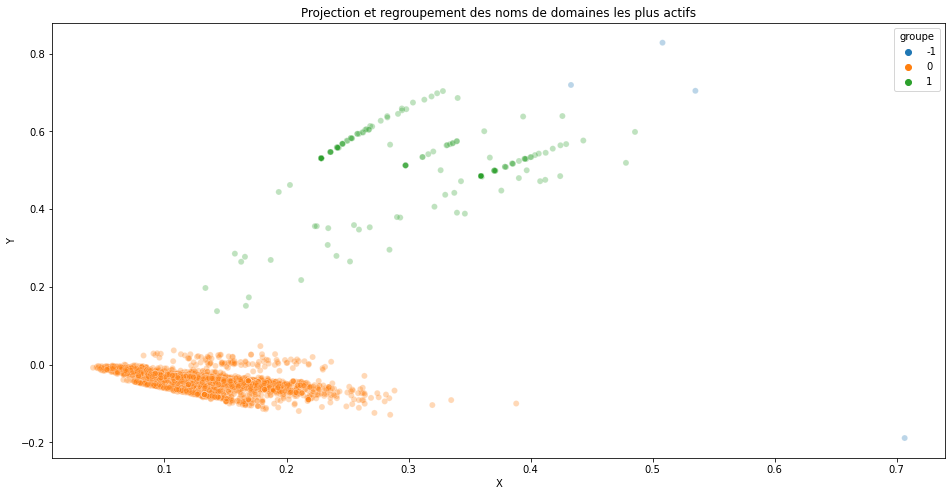

In [ ]:
# 2.3.3.b Résumez les résultats à l'aide d'un graphe Seaborn.
plt.figure(figsize=(16, 8));
plt.title("Projection et regroupement des noms de domaines les plus actifs")
sns.scatterplot(data=results, x="X", y="Y", hue="groupe", alpha=.3);

In [ ]:
# 2.3.3.c Comment récupérer les membres d'un même groupe ?
# ####### Qualifiez vos résultats de regroupement.
import random
results[results.groupe == str(random.randint(-1,72))]

,domaine,groupe,X,Y
4598,google.co.bw,4,0.300165,0.509627
4755,google.co.ug,4,0.300165,0.509627
4897,google.co.zw,4,0.300165,0.509627
4929,google.co.zm,4,0.300165,0.509627
4963,google.co.uz,4,0.300165,0.509627


In [ ]:
# 2.3.4 BONUS: Comment ajuster automatiquement vos hyperparamètres ?

## 3. Apprentissage supervisé

In [ ]:
!pip3 install git+https://github.com/ail-project/ail-typo-squatting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ail-project/ail-typo-squatting to /tmp/pip-req-build-ue_bgl9w
  Running command git clone -q https://github.com/ail-project/ail-typo-squatting /tmp/pip-req-build-ue_bgl9w
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 93 kB 1.7 MB/s 
  Created wheel for ail-typo-squatting: filename=ail_typo_squatting-2.1.0-py3-none-any.whl size=54112 sha256=bbe0c7c6666e9d6b5e35647ef3e1908f139f0715d6acc669b780a9d5e0b98e04
  Stored in directory: /tmp/pip-ephem-wheel-cache-10ez3oza/wheels/0f/d9/76/e538930ccd5f12614317ac2faa2e04f490b712d65e288b6573
Successfully built ail-typo-squatting
  Attempting uninstall: inflect
    Found existing installation: inflect 2.1.0
    Uninstalling inflect-2.1.0:
      Successfully uninstalled inflect-2.1.0


In [ ]:
import ail_typo_squatting as ats

### 3.1 Pré-traitement

In [ ]:
from textdistance import levenshtein

In [ ]:
# 3.1.1 Expliquez le fonctionnement de la distance de Levenshtein à l'aide de l'article Wikipédia.
# ##### Comment passer d'une distance à une mesure de similarité entre deux noms de domaine ?
# ##### https://fr.wikipedia.org/wiki/Distance_de_Levenshtein

In [ ]:
# 3.1.2 Implémentez votre mesure de similarité et testez-la avec les échantillons fournis.

p1 = ("grenoble-inp.fr", "bordeaux-inp.fr")
p2 = ("grenoble-inp.fr", "gren0ble-inp.fr")
p3 = ("duckduckgo.com", "ddg.gg")
p4 = ("google.fr", "google.it")

similarite = lambda x, y: 1 - (levenshtein(x, y) / max(len(x), len(y)))

similarite(*p1)
similarite(*p2)
similarite(*p3)
similarite(*p4)

0.7777777777777778

In [ ]:
# 3.1.3 Au vu de vos précédents résultats, définissez une stratégie de détection de typosquattage.
# ##### https://fr.wikipedia.org/wiki/Typosquattage

In [ ]:
victims = ["grenoble-inp.fr", "pyformat.info", "hypothesis.works", "devdocs.io"]

positives = pd.DataFrame()

for v in victims:
  reference = pd.Series([v]*20)
  observables = ats.runAll(v, limit=2000, formatoutput="text", pathOutput="")
  observables = pd.Series(observables).sample(20).reset_index(drop=True)
  scores = observables.apply(lambda x: similarite(x, v))
  temp = pd.DataFrame([reference, observables, scores]).T

  positives = pd.concat([positives, temp], axis="rows")

positives["label"] = 1
positives

,0,1,2,label
0,grenoble-inp.fr,grenoble-inp.report,0.736842,1
1,grenoble-inp.fr,grenoble-inp.coach,0.722222,1
2,grenoble-inp.fr,grenoble-inp.americanexpress,0.5,1
3,grenoble-inp.fr,grenoble-inp.br,0.933333,1
4,grenoble-inp.fr,grenoble-inp.kuokgroup,0.636364,1
...,...,...,...,...
15,devdocs.io,devdocs.si,0.8,1
16,devdocs.io,devdocs.nissay,0.642857,1
17,devdocs.io,devdocs.ng,0.8,1
18,devdocs.io,devdocs.xn--3ds443g,0.421053,1


In [ ]:
negatives = pd.DataFrame()

for v in victims:
  reference = pd.Series([v]*20)
  observables = domains.sample(20).reset_index(drop=True)
  scores = observables.apply(lambda x: similarite(x, v))
  temp = pd.DataFrame([reference, observables, scores]).T
  negatives = pd.concat([negatives, temp], axis="rows")

negatives.columns = [0, 1, 2]
negatives["label"] = 0
negatives

,0,1,2,label
0,grenoble-inp.fr,ikea.com,0.066667,0
1,grenoble-inp.fr,amzn.to,0.133333,0
2,grenoble-inp.fr,unlv.edu,0.133333,0
3,grenoble-inp.fr,americanprogress.org,0.2,0
4,grenoble-inp.fr,csoonline.com,0.266667,0
...,...,...,...,...
15,devdocs.io,pravo.gov.ru,0.166667,0
16,devdocs.io,mikecrm.com,0.181818,0
17,devdocs.io,fgov.be,0.2,0
18,devdocs.io,imore.com,0.2,0


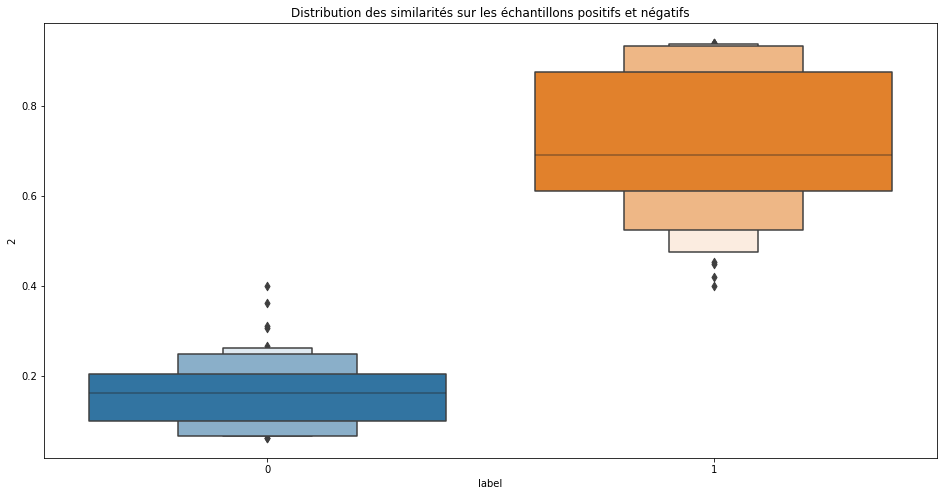

In [ ]:
entrainement = pd.concat([positives, negatives], axis="rows", ignore_index=True)

plt.figure(figsize=(16,8))
plt.title("Distribution des similarités sur les échantillons positifs et négatifs")
sns.boxenplot(data=entrainement, y=2, x="label");

### 3.2 Classification heuristique

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
# 3.2.1.a Définissez une fonction fit qui détermine un seuil de détection à partir de données labellisées.

In [ ]:
# 3.2.1.b Définissez une fonction predict qui labellise des données en fonction d'un seuil preexistant.

In [ ]:
# 3.2.2 À partir de ces fonctions, créez un estimateur heuristique dérivé de BaseEstimator.

In [ ]:
class HeuristicClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, limit = 0.75):
        self.limit = limit

    def fit(self, X, y=None):
        training_data = pd.DataFrame([X, y]).T
        positive = training_data[training_data[1] == 1][0]
        negative = training_data[training_data[1] == 0][0]
        self.limit = (positive.mean() + negative.mean()) / 2

    def predict(self, X, y=None):
        observables = pd.Series(X)

        filtre = (observables > self.limit) & (observables < 1)

        observables[~filtre] = 0
        observables[filtre] = 1

        return np.array(observables, dtype=int)


In [ ]:
# 3.2.3 Entrainez et évaluez votre modèle. Quelle est sa précision ?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(entrainement[2])
y = np.array(entrainement["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = HeuristicClassifier()
model.fit(X_train, y_train)

In [ ]:
model.limit

0.4436684966481318

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



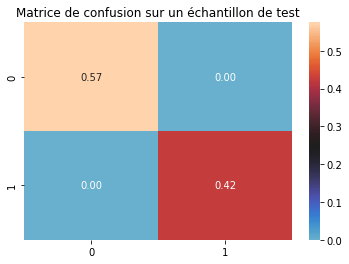

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, normalize="all")

plt.title("Matrice de confusion sur un échantillon de test");
sns.heatmap(cm, center=.25, annot=True, fmt=".2f");

In [ ]:
# 3.2.4 BONUS: Comparez votre modèle à un autre modèle fourni par scikit-learn (régression logistique, arbre de décision).

### 3.3 Mise en production

 - 3.3.1 **Pipelines de traitement**
 - 3.3.2 **Versionnage et mises à jour**
 - 3.3.3 **Mise en service du modèle**

https://www.youtube.com/watch?v=zhgRFBWa6bk